# Telco Customer Churn
Objectives: To predict customers who are most likely subject to churn

* [Scrub Data](#scrub)
* EDA - [Heatmap](#heatmap)
* EDA - [Histogram](#histogram)
* EDA - [DataFrame.style](#dataframe)
* EDA - [CountPlot](#countplot)
* [Initial Decision Tree](#tree)
* [Feature Selection](#feat_imp)
* [Final Decison Tree](#final_tree)
* [Logistic Regression](#logistic)


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/theleadio/datascience_demo/master/telco_customer_churn_dataset.csv")
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5734,6408-WHTEF,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,89.40,6376.55,No
2522,0661-KBKPA,Male,0,Yes,Yes,53,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,78.75,3942.45,No
5572,4654-ULTTN,Male,0,Yes,No,70,Yes,Yes,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic),74.80,5315.8,No
5072,5995-SNNEW,Male,1,Yes,No,23,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.45,2184.85,No
1234,4525-VZCZG,Male,0,No,Yes,54,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,105.85,5826.65,No
2100,6227-FBDXH,Male,0,Yes,No,69,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),99.50,6841.45,No
1423,0680-DFNNY,Male,0,Yes,No,15,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.10,1504.05,Yes
3713,6961-VCPMC,Male,1,Yes,No,46,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.40,3605.2,Yes
77,5590-ZSKRV,Female,0,Yes,Yes,8,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,54.65,482.25,No
2589,7576-OYWBN,Male,1,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.05,231.8,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<a id='scrub'></a>
# Scrub Data

In [4]:
categorical_columns = df.drop(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges'], axis = 1).columns.tolist()

# print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of variable: %s'%col)
    print (df[col].value_counts())


Frequency of variable: gender
Male      3555
Female    3488
Name: gender, dtype: int64

Frequency of variable: SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Frequency of variable: Partner
No     3641
Yes    3402
Name: Partner, dtype: int64

Frequency of variable: Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64

Frequency of variable: PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64

Frequency of variable: MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Frequency of variable: InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Frequency of variable: OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

Frequency of variable: OnlineBackup
No                     3088
Yes                    2429
No internet servic

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [6]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for column in binary_cols:
    df[column] = df[column].map({'No': 0, 'Yes': 1})


In [7]:
binning = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in binning:
    df[column] = df[column].map({'No': 0, 'Yes': 1, 'No internet service': 0})

In [8]:
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['MultipleLines'] = df['MultipleLines'].map({'No': 0, 'Yes': 1, 'No phone service': 0})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [10]:
cols_enc = ['InternetService', 'Contract', 'PaymentMethod']
prefix_dict = {'InternetService':'InternetService', 
               'Contract':'Contract', 
               'PaymentMethod':'PaymentMethod'}

df_enc = pd.get_dummies(df, prefix=prefix_dict, columns=cols_enc)
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int64  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   MultipleLines                            7043 non-null   int64  
 8   OnlineSecurity                           7043 non-null   int64  
 9   OnlineBackup                             7043 non-null   int64  
 10  DeviceProtection                         7043 no

In [11]:
df_enc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


# Explore Data

<a id='heatmap'></a>
### Heatmap

In [12]:
df2 = df_enc.drop('customerID', axis=1)

C:\Users\munmun\AppData\Local\Temp/ipykernel_20168/4179990973.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


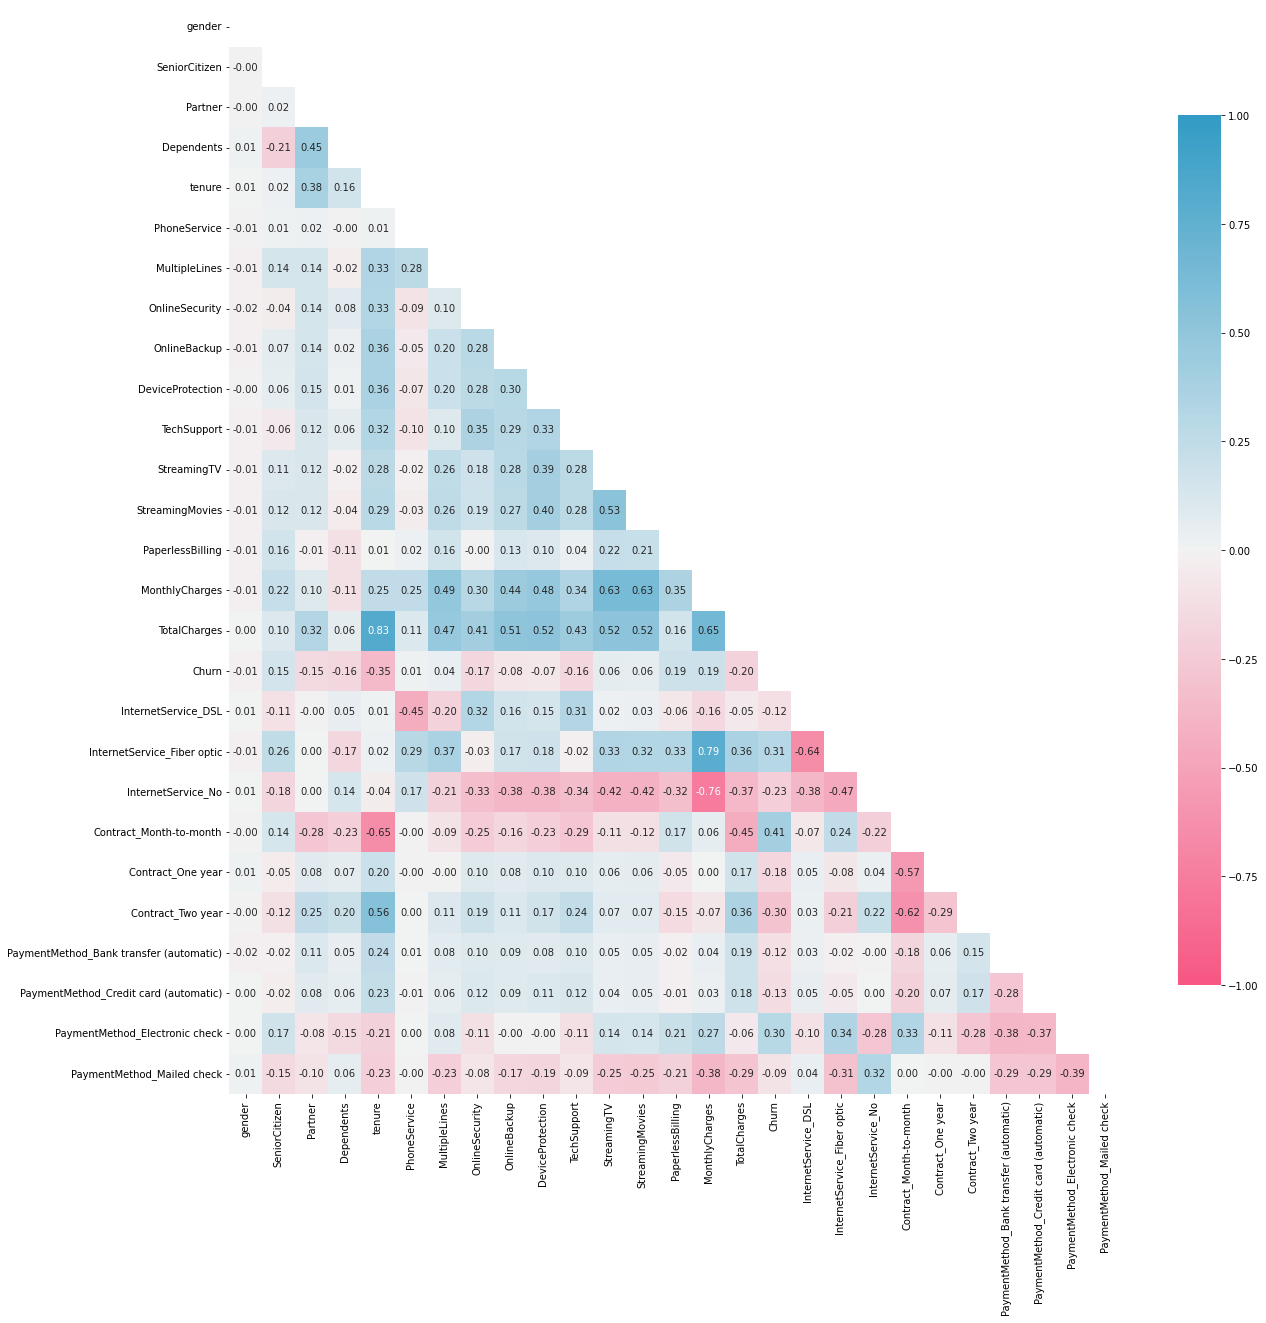

In [13]:
import numpy as np

fig, ax = plt.subplots(figsize=(20, 20))

corr = df2.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=cmap, vmin=-1, vmax=1, cbar_kws={"shrink": .8})

plt.show()

# https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c

| ⬆️ Churn | ➕ Correlation |
|-------|-------|
| Contract_Month-to-month | 0.41 |
| InternetService_Fiber optic | 0.31 |
| PaymentMethod_Electronic check | 0.30 |
| PaperlessBilling | 0.19 |
| MonthlyCharges | 0.19 | 


| ⬆️ Churn | ➖ Correlation |
|-----|-----|
| tenure | -0.35 |
| Contract_Two year | -0.30 |
| InternetService_No | -0.23 |
| TotalCharges | -0.20 |


<a id='histogram'></a>
### Histogram

(array([1612.,  759.,  570.,  556.,  495.,  494.,  452.,  495.,  501.,
        1109.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

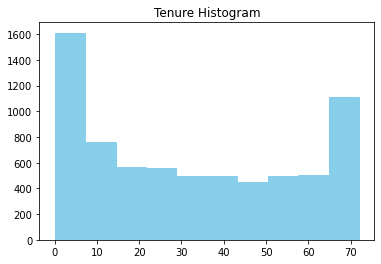

In [14]:
x = df2['tenure']

plt.title('Tenure Histogram')
plt.hist(x, color="skyblue", ec="skyblue")

* Histogram of tenure appears as a U-shaped graph
* Engagement of telco customers is not static and changes over time

(array([1606.,  191.,  365.,  639.,  473.,  895.,  953.,  869.,  758.,
         294.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <BarContainer object of 10 artists>)

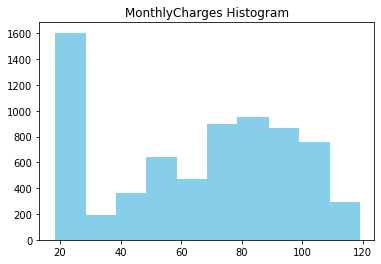

In [15]:
x = df2['MonthlyCharges']

plt.title('MonthlyCharges Histogram')
plt.hist(x, color="skyblue", ec="skyblue")

* A big chunk of customers with monthly charges below USD 30 

(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

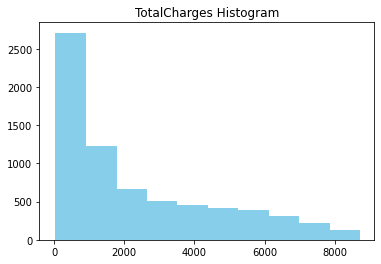

In [16]:
x = df2['TotalCharges']

plt.title('TotalCharges Histogram')
plt.hist(x, color="skyblue", ec="skyblue")

* Total charges with right skewed distribution
* Most customers with total charges below USD 4k

<a id='dataframe'></a>
### DataFrame.style

In [17]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
713,0,0,0,1,14,1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
4190,0,0,1,0,11,1,1,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1636,0,0,0,0,48,1,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
2259,0,0,0,0,8,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4087,0,0,0,0,10,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [18]:
churn_yes = len(df2[df2['Churn'] == 1])
churn_no = len(df2[df2['Churn'] == 0])
churn_rate = churn_yes / (churn_yes + churn_no) * 100

pd.DataFrame({'Total Bad': churn_yes, 'Total Good': churn_no, 'Portfolio Churn Rate %': [round(churn_rate, 2)]})

,Total Bad,Total Good,Portfolio Churn Rate %
0,1869,5174,26.54


In [19]:
new_df = {}
new_df['male'] = df2.loc[df2['gender'] == 1, 'Churn'].value_counts()
new_df['female'] = df2.loc[df2['gender'] == 0, 'Churn'].value_counts()
new_df['senior'] = df2.loc[df2['SeniorCitizen'] == 1, 'Churn'].value_counts()
new_df['non-senior'] = df2.loc[df2['SeniorCitizen'] == 0, 'Churn'].value_counts()
new_df['tenure_lt_1yr'] = df2.loc[df2['tenure'] < 12, 'Churn'].value_counts()
new_df['tenure_lt_2yr'] = df2.loc[df2['tenure'] < 24, 'Churn'].value_counts()
new_df['tenure_lt_3yr'] = df2.loc[df2['tenure'] < 36, 'Churn'].value_counts()
new_df['tenure_gt_5yr'] = df2.loc[df2['tenure'] > 60, 'Churn'].value_counts()
new_df['1mth_contract'] = df2.loc[df2['Contract_Month-to-month'] == 1, 'Churn'].value_counts()
new_df['1yr_contract'] = df2.loc[df2['Contract_One year'] == 1, 'Churn'].value_counts()
new_df['2yr_contract'] = df2.loc[df2['Contract_Two year'] == 1, 'Churn'].value_counts()


In [20]:
new_df = pd.DataFrame(new_df).T

In [21]:
new_df['Churn Rate %'] = new_df[1] / (new_df[1] + new_df[0])

sorted_new_df = new_df.sort_values(by=['Churn Rate %'], ascending=False)
sorted_new_df.head(13).style.format({0: "{:.0f}", 1: "{:.0f}", 'Churn Rate %': "{:.2%}"})\
                            .bar(subset=['Churn Rate %'], color='#ee1f5f')

,0,1,Churn Rate %
tenure_lt_1yr,1070,999,48.28%
1mth_contract,2220,1655,42.71%
tenure_lt_2yr,1808,1308,41.98%
senior,666,476,41.68%
tenure_lt_3yr,2491,1501,37.60%
female,2549,939,26.92%
male,2625,930,26.16%
non-senior,4508,1393,23.61%
1yr_contract,1307,166,11.27%
tenure_gt_5yr,1314,93,6.61%


Comparison of Churn Rates: 
* Long-tenure customers are less likely to churn - Churn rate of tenure less than 1 year is 48.28%
* Customers with more flexible month-to-month contract are more likely to churn - Churn rate of monthly contract is 42.71%
* A high portion of senior citizens will churn than non-senior citizens
* Female is slightly likely to churn compared with male

<a id='countplot'></a>
### CountPlot

<AxesSubplot:xlabel='Contract_Two year', ylabel='count'>

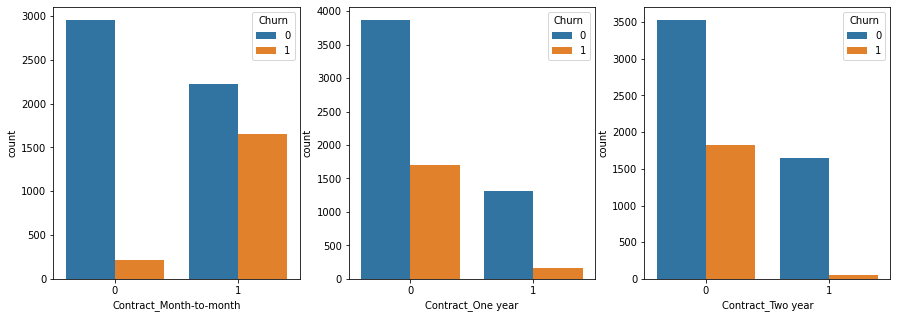

In [22]:
main, subplots = plt.subplots(1, 3, figsize=(15,5))
sns.countplot(data=df2, x="Contract_Month-to-month", hue="Churn", ax=subplots[0])
sns.countplot(data=df2, x="Contract_One year", hue="Churn", ax=subplots[1])
sns.countplot(data=df2, x="Contract_Two year", hue="Churn", ax=subplots[2])

<AxesSubplot:xlabel='PaymentMethod_Mailed check', ylabel='count'>

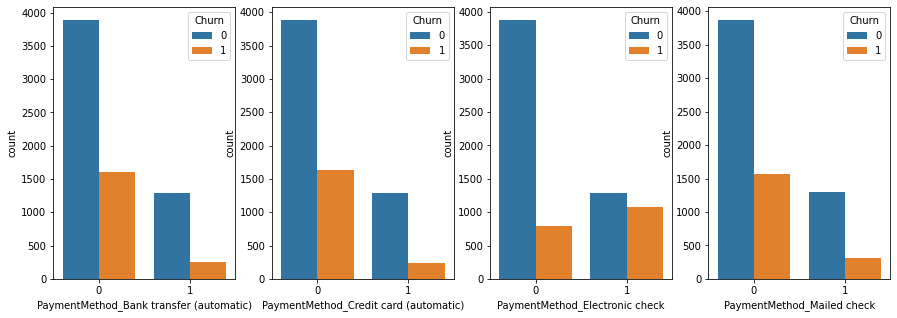

In [23]:
main, subplots = plt.subplots(1, 4, figsize=(15,5))
sns.countplot(data=df2, x="PaymentMethod_Bank transfer (automatic)", hue="Churn", ax=subplots[0])
sns.countplot(data=df2, x="PaymentMethod_Credit card (automatic)", hue="Churn", ax=subplots[1])
sns.countplot(data=df2, x="PaymentMethod_Electronic check", hue="Churn", ax=subplots[2])
sns.countplot(data=df2, x="PaymentMethod_Mailed check", hue="Churn", ax=subplots[3])

* PaymentMethod_Electronic check has the highest churn rate compared with other payment methods

<AxesSubplot:xlabel='InternetService_No', ylabel='count'>

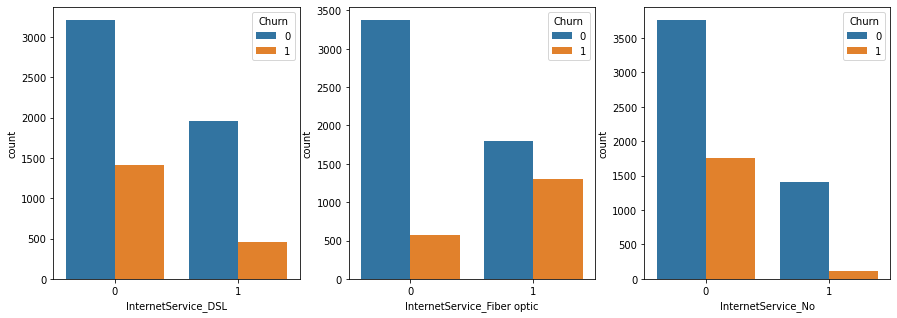

In [24]:
main, subplots = plt.subplots(1, 3, figsize=(15,5))
sns.countplot(data=df2, x="InternetService_DSL", hue="Churn", ax=subplots[0])
sns.countplot(data=df2, x="InternetService_Fiber optic", hue="Churn", ax=subplots[1])
sns.countplot(data=df2, x="InternetService_No", hue="Churn", ax=subplots[2])

* InternetService_Fiber optic has the highest churn rate, followed by InternetService_DSL and InternetService_No
* Implying fiber internet customers are not statisfied with the service

<a id='tree'></a>
# Initial Decision Tree




Target: Churn

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
import graphviz

In [26]:
df3 = df2.dropna()

In [27]:
train_data = df3.drop(['Churn'], axis=1)
train_labels = df3['Churn']

X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.3, random_state=1)

model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
string = "Accuracy = {AR:.2%}"

y_pred = model.predict(X_test)
AR = metrics.accuracy_score(y_test, y_pred)
print(string.format(AR = AR))

Accuracy = 79.76%


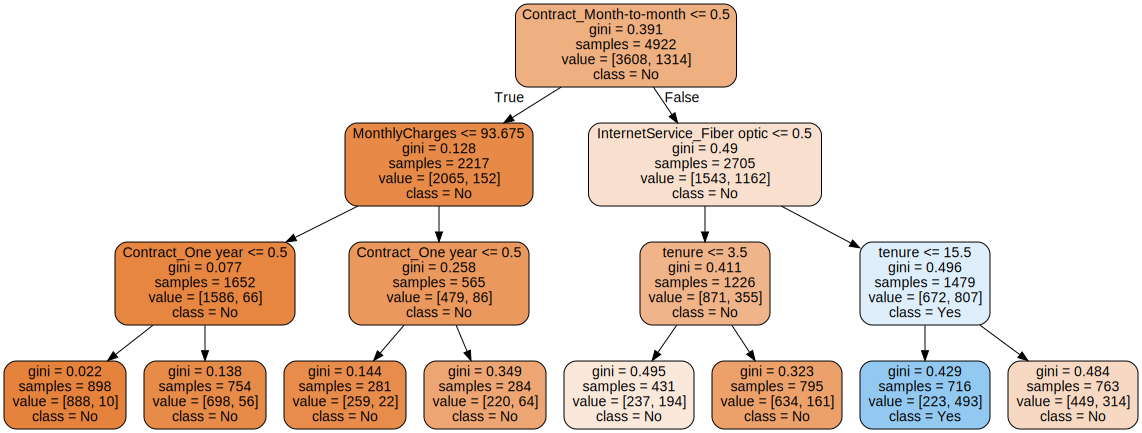

In [29]:
columns = list(X_train.columns)
dot_data = tree.export_graphviz(model, out_file=None, feature_names=columns, class_names=['No', 'Yes'], filled=True, rounded=True)

graph = graphviz.Source(dot_data)
graph

* Monthly contract with tenure <= 15.5 is most likely to churn (493 out of 716)

<a id='feat_imp'></a>
# Feature Selection

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

# https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [31]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

ExtraTreesClassifier()

<AxesSubplot:>

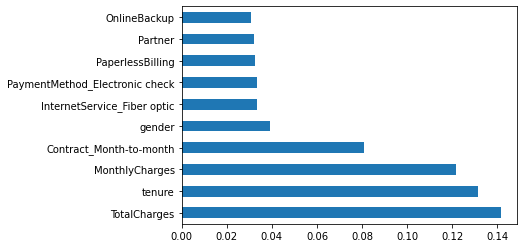

In [32]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False,inplace=True)
feat_importances.nlargest(10).plot(kind="barh")


* Top 3 feature importances - TotalCharges, tenure, MonthlyCharges

<a id='final_tree'></a>
# Final Decision Tree

In [33]:
df4 = df2.rename(columns={"InternetService_Fiber optic": "FiberOptic", 
                          "PaymentMethod_Electronic check": "ElectronicCheck"})

In [34]:
# top features
# TotalCharges highly correlated with Tenure [0.83] - drop TotalCharges
# FiberOptic highly correlated with MonthlyCharges [0.79]

selected_feat= ['tenure', 'MonthlyCharges', 'Contract_Month-to-month', 
                'gender', 'ElectronicCheck', 'PaperlessBilling']

train_data_2 = {}
train_data_2 = df4[selected_feat]
train_label_2 = df4['Churn']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(train_data_2, train_label_2, test_size=0.3, random_state=1)

model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(X_train_2, y_train_2)

DecisionTreeClassifier(max_depth=3)

In [35]:
string = "Accuracy = {AR:.2%}"

y_pred_2 = model.predict(X_test_2)
AR = metrics.accuracy_score(y_test_2, y_pred_2)
print(string.format(AR = AR))

Accuracy = 80.08%


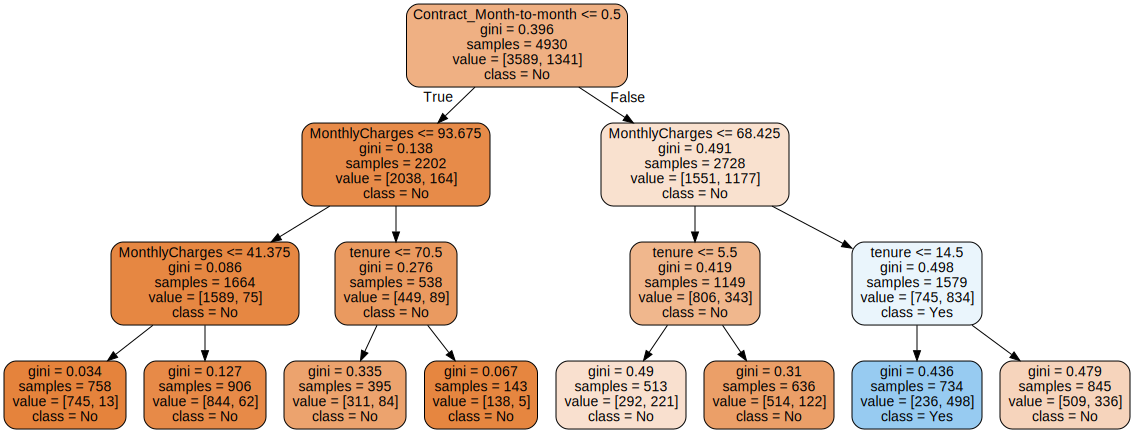

In [36]:
columns = list(X_train_2.columns)
dot_data = tree.export_graphviz(model, out_file=None, feature_names=columns, class_names=['No', 'Yes'], filled=True, rounded=True)

graph = graphviz.Source(dot_data)
graph

* Monthly contract with short tenure is most likely to churn 
  - Tenure <= 14.5 having 67.85% churn rate
  - Tenure > 14.5 having 39.76% churn rate

* Monthly contract with high monthly charges ~$94 and tenure <= 70.5 has higher churn rate than tenure > 70.5

* A non-monthly contract with low monthly charges ~$41 is less likely to churn 
  - 1.72% churn rate

`Determinants of Telco Churn - Flexible Monthly Contract, Short Tenure, High Monthly Charges`


In [37]:
df_predict = {}
df_predict = train_data_2.iloc[0:0].copy()

In [38]:
df_predict = df_predict.append({
    "tenure": 12, 
    "MonthlyCharges": 90, 
    "Contract_Month-to-month": 1, 
    "gender": 0, 
    "ElectronicCheck": 1, 
    "PaperlessBilling": 0
}, ignore_index=True)

In [39]:
df_predict

,tenure,MonthlyCharges,Contract_Month-to-month,gender,ElectronicCheck,PaperlessBilling
0,12,90.0,1,0,1,0


In [40]:
model.predict(df_predict)

array([1], dtype=int64)

<a id='logistic'></a>
# Logistics Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [42]:
reg = LogisticRegression()
reg.fit(X_train_2, y_train_2)
y_pred = reg.predict(X_test_2)

In [43]:
string = "Accuracy of logistic regression = {AR:.2%}"
reg.score(X_test_2, y_test_2)
print(string.format(AR = AR))

Accuracy of logistic regression = 80.08%


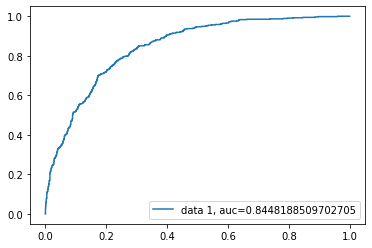

In [44]:
y_pred_proba = reg.predict_proba(X_test_2)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_2, y_pred_proba)
auc = metrics.roc_auc_score(y_test_2, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [45]:
reg_outputs = reg.predict(X_train_2)
reg_outputs

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [46]:
reg_outputs == y_train_2

5925     True
4395    False
1579     True
1040    False
1074     True
        ...  
905      True
5192     True
3980     True
235     False
5157     True
Name: Churn, Length: 4930, dtype: bool

In [47]:
np.sum((reg_outputs == y_train_2))

3869

In [48]:
reg_outputs.shape[0]

4930

In [49]:
string = "Area Under Curve = {AR:.2%}"
log_AR = np.sum((reg_outputs == y_train_2)) / reg_outputs.shape[0]
print(string.format(AR = log_AR))

Area Under Curve = 78.48%


In [50]:
summary_table = pd.DataFrame(columns=['Features'], data=selected_feat)
summary_table['Coefficient'] = np.transpose(reg.coef_)
summary_table

,Features,Coefficient
0,tenure,-0.036192
1,MonthlyCharges,0.024049
2,Contract_Month-to-month,1.090983
3,gender,0.011962
4,ElectronicCheck,0.531726
5,PaperlessBilling,0.411038


In [51]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Features,Coefficient
0,Intercept,-2.897860
1,tenure,-0.036192
2,MonthlyCharges,0.024049
3,Contract_Month-to-month,1.090983
4,gender,0.011962
5,ElectronicCheck,0.531726
6,PaperlessBilling,0.411038


In [52]:
summary_table['Odds_Ratio'] = np.exp(summary_table.Coefficient)
summary_table.sort_values('Odds_Ratio', ascending=False)

,Features,Coefficient,Odds_Ratio
3,Contract_Month-to-month,1.090983,2.977201
5,ElectronicCheck,0.531726,1.701867
6,PaperlessBilling,0.411038,1.508382
2,MonthlyCharges,0.024049,1.024340
4,gender,0.011962,1.012034
1,tenure,-0.036192,0.964455
0,Intercept,-2.897860,0.055141
